In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [128]:
tt_data=pd.read_csv('tested.csv')
tt_data.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S


In [129]:
tt_data.shape

(418, 12)

In [130]:
tt_data.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


# DATA CLEANING

In [131]:
tt_data.isnull().sum() #checking for missing values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [132]:
tt_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [133]:
#Drop cabin column
tt_data.drop(columns='Cabin', axis=1, inplace=True)

In [134]:
tt_data.isnull().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64

In [135]:

tt_data['Age'].fillna(tt_data['Age'].mean(), inplace=True)
missing_values_count = tt_data.isna().sum()
print(missing_values_count)


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64


In [136]:
tt_data['Fare'].fillna(0, inplace=True)
missing_values_count = tt_data.isna().sum()
print(missing_values_count)


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [137]:
#CLEANED 

# Data analysis

In [138]:
tt_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [139]:
tt_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.541956
std,120.810458,0.481622,0.841838,12.634534,0.896760,0.981429,55.867684
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.471875
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [140]:
tt_data['Sex'].value_counts()

Sex
male      266
female    152
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

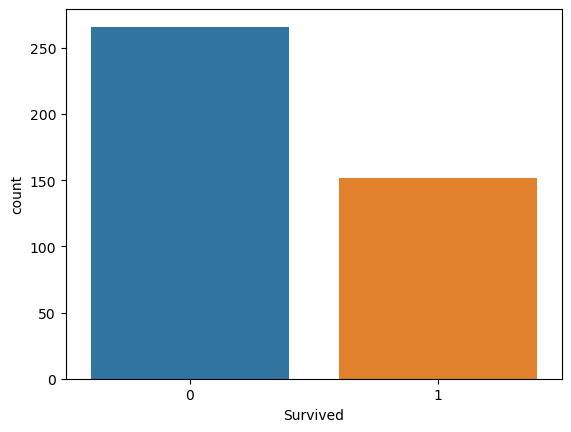

In [141]:
sns.countplot(x='Survived',data=tt_data)

<Axes: xlabel='Sex', ylabel='count'>

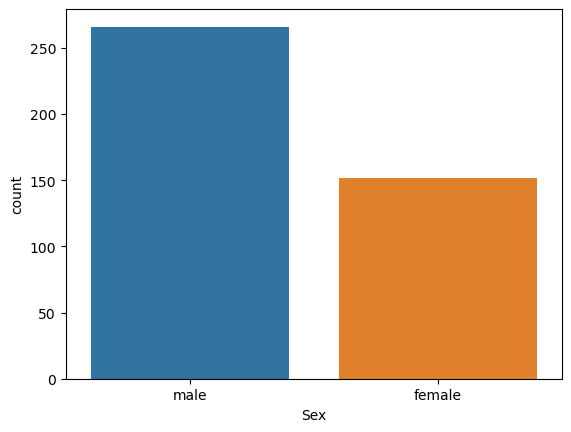

In [142]:
sns.countplot(x='Sex',data=tt_data)  


In [143]:
tt_data['Survived'].value_counts()

Survived
0    266
1    152
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

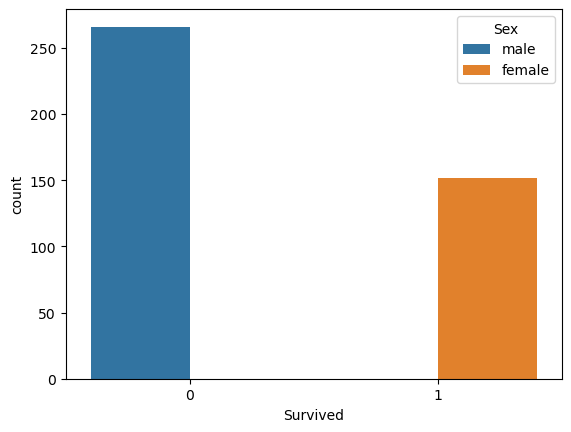

In [144]:
sns.countplot(x="Survived", hue="Sex", data=tt_data)

In [145]:
tt_data['Pclass'].value_counts()

Pclass
3    218
1    107
2     93
Name: count, dtype: int64

<Axes: xlabel='Pclass', ylabel='count'>

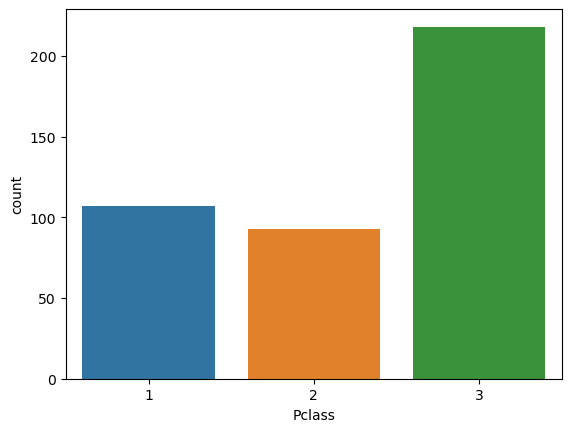

In [146]:
sns.countplot(x='Pclass', data=tt_data)

<Axes: xlabel='Survived', ylabel='count'>

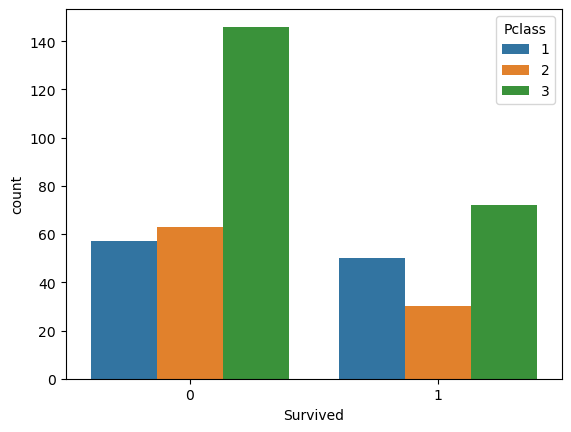

In [147]:
sns.countplot(x='Survived',hue='Pclass', data=tt_data)

<Axes: ylabel='Frequency'>

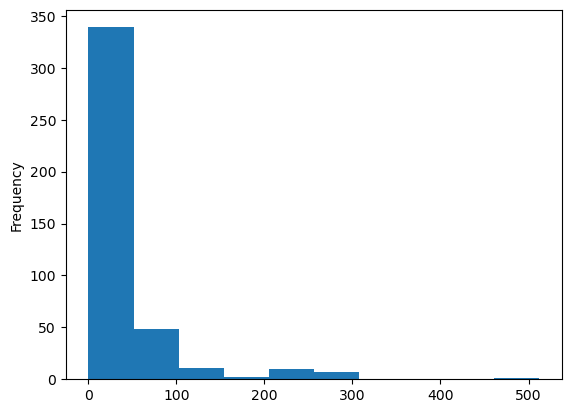

In [148]:
tt_data['Fare'].plot.hist()

<Axes: ylabel='Frequency'>

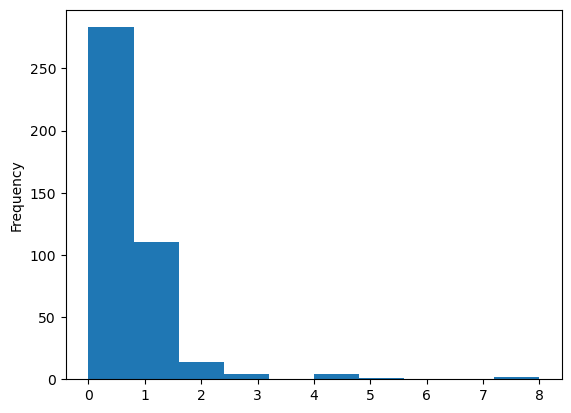

In [149]:
tt_data['SibSp'].plot.hist()

In [150]:
tt_data['Parch'].value_counts()

Parch
0    324
1     52
2     33
3      3
4      2
9      2
6      1
5      1
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

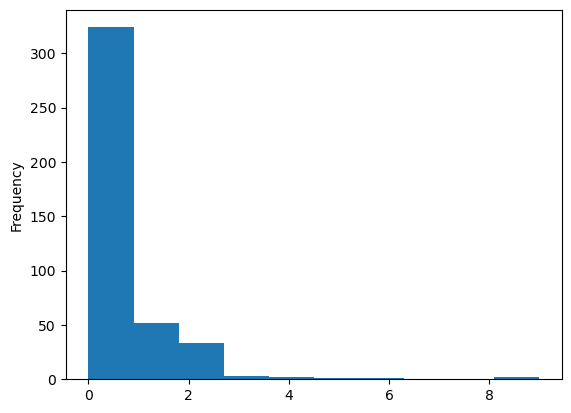

In [151]:
tt_data['Parch'].plot.hist()

# DATA ENCODING

In [152]:
tt_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [153]:
# some cell data are not numerical for training we need to encode them
labelencoder=LabelEncoder()

In [154]:
tt_data['Sex']=labelencoder.fit_transform(tt_data['Sex'])
#male=1 female=0
tt_data['Embarked']=labelencoder.fit_transform(tt_data['Embarked'])


In [155]:
tt_data['Embarked'].unique() #q=1 s=2 c=0

array([1, 2, 0])

x=tt_data.drop([ 'Survived'], axis = 1)
y=tt_data['Survived']



In [156]:
tt_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,1
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,2
2,894,0,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,1
3,895,0,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,2
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,2


In [157]:
tt_data = tt_data.drop(['Name', 'Ticket', 'PassengerId'], axis=1)


In [158]:
tt_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,34.5,0,0,7.8292,1
1,1,3,0,47.0,1,0,7.0000,2
2,0,2,1,62.0,0,0,9.6875,1
3,0,3,1,27.0,0,0,8.6625,2
4,1,3,0,22.0,1,1,12.2875,2


In [159]:
x = tt_data.drop(['Survived'], axis = 1)
y = tt_data['Survived']

In [160]:
print(x)

     Pclass  Sex       Age  SibSp  Parch      Fare  Embarked
0         3    1  34.50000      0      0    7.8292         1
1         3    0  47.00000      1      0    7.0000         2
2         2    1  62.00000      0      0    9.6875         1
3         3    1  27.00000      0      0    8.6625         2
4         3    0  22.00000      1      1   12.2875         2
..      ...  ...       ...    ...    ...       ...       ...
413       3    1  30.27259      0      0    8.0500         2
414       1    0  39.00000      0      0  108.9000         0
415       3    1  38.50000      0      0    7.2500         2
416       3    1  30.27259      0      0    8.0500         2
417       3    1  30.27259      1      1   22.3583         0

[418 rows x 7 columns]


In [161]:
print(y)

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64


# SPLITTNG DATA TO TRAINING AND TESTING 

In [93]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=1)

In [94]:
 print (x.shape, x_train.shape,x_test.shape)

(418, 7) (334, 7) (84, 7)


# Model training using logistic regression

In [95]:
lm=LogisticRegression()

In [96]:
lm.fit(x_train, y_train)



C:\Users\WILSONA\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [97]:
y_pred = lm.predict(x_test)



In [98]:
from sklearn.metrics import accuracy_score

In [99]:
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Make predictions on the training set
y_pred_train = lm.predict(x_train)

# Calculate and print the accuracy on the training set
train_accuracy = accuracy_score(y_train, y_pred_train)
print(f"Training Accuracy: {train_accuracy:.2f}")

Test Accuracy: 1.00
Training Accuracy: 1.00


In [100]:
from sklearn.metrics import classification_report

In [101]:
predictions=lm.predict(x_test)

In [102]:
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        58\n           1       1.00      1.00      1.00        26\n\n    accuracy                           1.00        84\n   macro avg       1.00      1.00      1.00        84\nweighted avg       1.00      1.00      1.00        84\n'

In [103]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ', accuracy)

# Precision
precision = precision_score(y_test, y_pred)
print('Precision: ', precision)

# Recall
recall = recall_score(y_test, y_pred)
print('Recall: ', recall)

# F1 Score
f1 = f1_score(y_test, y_pred)
print('F1 Score: ', f1)


Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1 Score:  1.0


# Using Random Forest

In [162]:
from sklearn.ensemble import RandomForestRegressor

In [163]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=1)

In [164]:
random=RandomForestRegressor(n_estimators=100)

In [165]:
random.fit(x_train,y_train)

RandomForestRegressor()

In [166]:
test_data_prediction = random.predict(x_test)

In [167]:
print(test_data_prediction)

[0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0.
 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0.
 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0.]


In [168]:
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        58\n           1       1.00      1.00      1.00        26\n\n    accuracy                           1.00        84\n   macro avg       1.00      1.00      1.00        84\nweighted avg       1.00      1.00      1.00        84\n'

In [169]:
# Predict the target values on the training and test data
train_predictions = random.predict(x_train)
test_predictions = random.predict(x_test)

# Calculate and print the classification metrics for the training data
train_accuracy = accuracy_score(y_train, train_predictions)
train_precision = precision_score(y_train, train_predictions)
train_recall = recall_score(y_train, train_predictions)
train_f1_score = f1_score(y_train, train_predictions)

print("Training Accuracy:", train_accuracy)
print("Training Precision:", train_precision)
print("Training Recall:", train_recall)
print("Training F1 Score:", train_f1_score)

# Calculate and print the classification metrics for the test data
test_accuracy = accuracy_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions)
test_recall = recall_score(y_test, test_predictions)
test_f1_score = f1_score(y_test, test_predictions)

print("Test Accuracy:", test_accuracy)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)
print("Test F1 Score:", test_f1_score)


Training Accuracy: 1.0
Training Precision: 1.0
Training Recall: 1.0
Training F1 Score: 1.0
Test Accuracy: 1.0
Test Precision: 1.0
Test Recall: 1.0
Test F1 Score: 1.0


# MODEL ACCURACY FOR THE 2 MODELS USED

In [176]:

accuracy = accuracy_score(y_test, logistic_predictions)
print("Accuracy (Logistic Regression): {:.2f}%".format(accuracy * 100))


Accuracy (Logistic Regression): 55.95%


In [177]:

accuracy = accuracy_score(y_test, rf_predictions)
print("Accuracy (Random Forest): {:.2f}%".format(accuracy * 100))


Accuracy (Random Forest): 100.00%


In [ ]:
# Random forest was better for this data